## 🖼️ Stage 4: Convolutional Neural Networks (CNNs)

### Topics:
- Convolution and Pooling Operations.
- Classic Architectures: LeNet, AlexNet, VGG, ResNet, Inception.
- Transfer Learning and Fine-Tuning.
- Applications: Image Classification, Object Detection (YOLO, SSD), Semantic Segmentation (UNet).


## 🧠 Convolution and Pooling Operations

### 🔹 Convolution Operation

The convolution operation performs a **discrete linear operation** between an input tensor (e.g., image) and a learnable kernel/filter, resulting in a **feature map**.

#### **Mathematical Formulation**

Given:
- Input tensor: $ X \in \mathbb{R}^{H \times W \times C}$
- Filter: $ K \in \mathbb{R}^{k_h \times k_w \times C}$
- Stride: $s$
- Padding: $ p$

The convolution output $ Y \in \mathbb{R}^{H' \times W'}$ is:

$$
Y[i,j] = \sum_{m=0}^{k_h-1} \sum_{n=0}^{k_w-1} \sum_{c=0}^{C-1} K[m,n,c] \cdot X[i \cdot s + m, j \cdot s + n, c]
$$

Where output dimensions are:

$$
H' = \left\lfloor \frac{H + 2p - k_h}{s} \right\rfloor + 1, \quad W' = \left\lfloor \frac{W + 2p - k_w}{s} \right\rfloor + 1
$$

#### **Key Concepts**
- Filters are **shared** across space → reduces parameters.
- Multiple filters yield **multiple output channels**.
- The result is a **feature map** that captures learned patterns.

---


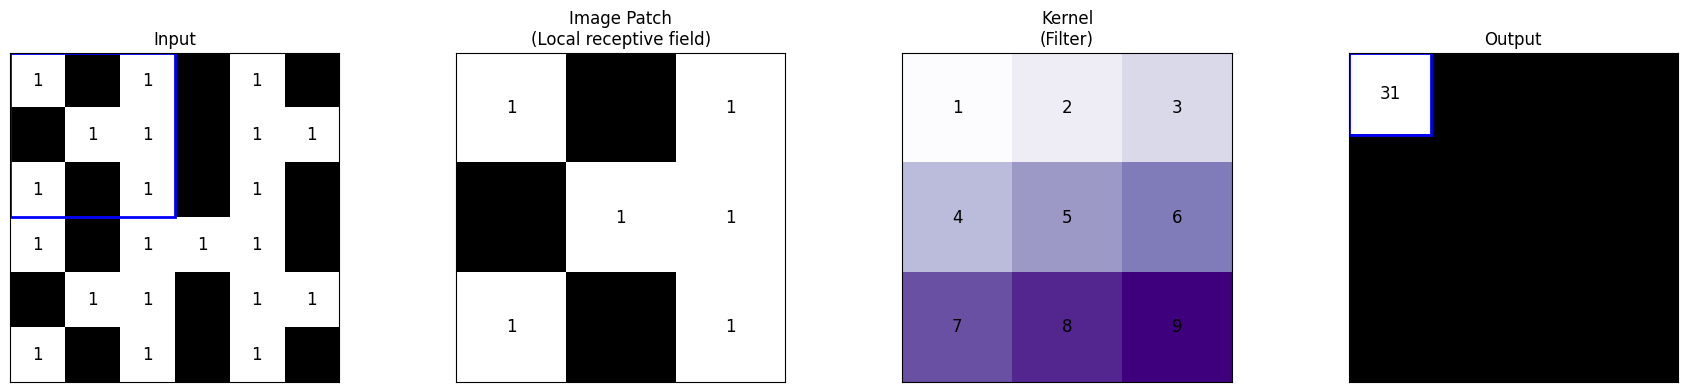

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_matrix_with_values(ax, matrix, title, highlight_rect=None, cmap='gray', text_color='black', vmin=None, vmax=None):
    ax.imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Annotate values
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, str(matrix[i, j]), ha='center', va='center', color=text_color, fontsize=12)

    # Optional highlight rectangle
    if highlight_rect:
        x, y, w, h = highlight_rect
        ax.add_patch(patches.Rectangle((x - 0.5, y - 0.5), w, h, linewidth=2, edgecolor='blue', facecolor='none'))

# Input matrix (6x6)
input_matrix = np.array([
    [1, 0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0],
    [1, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0]
])

# Kernel (3x3)
kernel = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Extract top-left 3x3 patch
patch = input_matrix[:3, :3]

# Apply convolution (dot product)
result = np.sum(patch * kernel)

# Output placeholder
output_matrix = np.zeros((4, 4), dtype=int)
output_matrix[0, 0] = result

# Set up figure
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

plot_matrix_with_values(axs[0], input_matrix, 'Input', highlight_rect=(0, 0, 3, 3))
plot_matrix_with_values(axs[1], patch, 'Image Patch\n(Local receptive field)', cmap='gray')
plot_matrix_with_values(axs[2], kernel, 'Kernel\n(Filter)', cmap='Purples')
plot_matrix_with_values(axs[3], output_matrix, 'Output', highlight_rect=(0, 0, 1, 1))

plt.tight_layout()
plt.show()




### 🔹 Pooling Operation

Pooling reduces the **spatial dimensions** of feature maps, helping to reduce overfitting and computation.

#### **Types**

Let $ X \in \mathbb{R}^{H \times W \times C} $, with pooling window size $ p \times p $ and stride $ s $.

- **Max Pooling**:

$$
Y[i,j,c] = \max_{0 \leq m < p,\; 0 \leq n < p} X[s \cdot i + m,\; s \cdot j + n,\; c]
$$

- **Average Pooling**:

$$
Y[i,j,c] = \frac{1}{p^2} \sum_{m=0}^{p-1} \sum_{n=0}^{p-1} X[s \cdot i + m,\; s \cdot j + n,\; c]
$$

#### **Output Size**:

$$
H' = \left\lfloor \frac{H - p}{s} \right\rfloor + 1, \quad W' = \left\lfloor \frac{W - p}{s} \right\rfloor + 1
$$



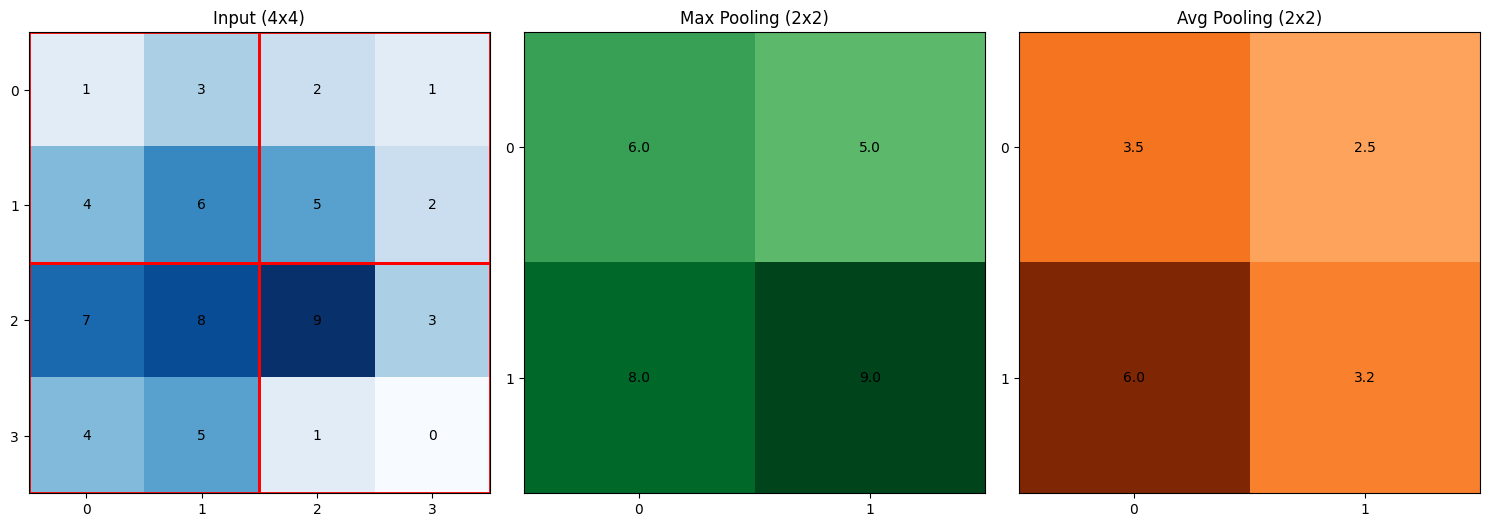

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sample input matrix (4x4)
input_matrix = np.array([
    [1, 3, 2, 1],
    [4, 6, 5, 2],
    [7, 8, 9, 3],
    [4, 5, 1, 0]
])

# Max pooling with 2x2 kernel, stride 2
pooled_max = np.array([
    [np.max(input_matrix[0:2, 0:2]), np.max(input_matrix[0:2, 2:4])],
    [np.max(input_matrix[2:4, 0:2]), np.max(input_matrix[2:4, 2:4])]
])

# Average pooling with 2x2 kernel, stride 2
pooled_avg = np.array([
    [np.mean(input_matrix[0:2, 0:2]), np.mean(input_matrix[0:2, 2:4])],
    [np.mean(input_matrix[2:4, 0:2]), np.mean(input_matrix[2:4, 2:4])]
])

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Input matrix
axs[0].imshow(input_matrix, cmap='Blues', vmin=0)
for i in range(4):
    for j in range(4):
        axs[0].text(j, i, input_matrix[i, j], ha='center', va='center', color='black')
axs[0].set_title('Input (4x4)')
axs[0].set_xticks(np.arange(4))
axs[0].set_yticks(np.arange(4))
for y in [0, 2]:
    for x in [0, 2]:
        rect = plt.Rectangle((x-0.5, y-0.5), 2, 2, edgecolor='red', facecolor='none', lw=2)
        axs[0].add_patch(rect)

# Max Pooled Output
axs[1].imshow(pooled_max, cmap='Greens', vmin=0)
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, f"{pooled_max[i, j]:.1f}", ha='center', va='center', color='black')
axs[1].set_title('Max Pooling (2x2)')
axs[1].set_xticks(np.arange(2))
axs[1].set_yticks(np.arange(2))

# Avg Pooled Output
axs[2].imshow(pooled_avg, cmap='Oranges', vmin=0)
for i in range(2):
    for j in range(2):
        axs[2].text(j, i, f"{pooled_avg[i, j]:.1f}", ha='center', va='center', color='black')
axs[2].set_title('Avg Pooling (2x2)')
axs[2].set_xticks(np.arange(2))
axs[2].set_yticks(np.arange(2))

plt.tight_layout()
plt.show()


---

### 🔹 CNN Layer Block Summary

1. **Convolution**:

$$
Z = X * K + b
$$

2. **Activation (e.g., ReLU)**:

$$
A = \max(0, Z)
$$

3. **Pooling (optional)**:

$$
P = \text{pool}(A)
$$

This sequence is repeated in deeper layers to learn increasingly abstract features.


2025-05-22 13:11:48.075181: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-05-22 13:11:48.075466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


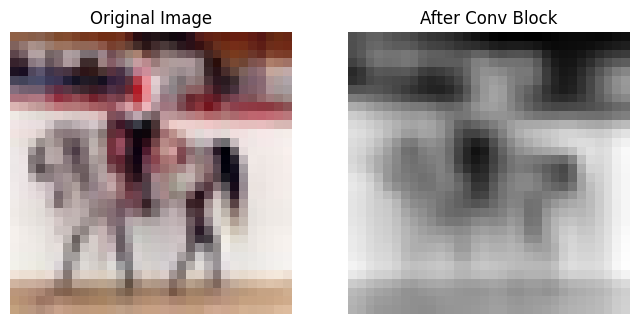

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

tfds.disable_progress_bar()  # Disable progress bar widgets

ds_train = tfds.load('cifar10', split='train', shuffle_files=True)
ds_train = ds_train.take(1).cache()


for example in ds_train:
    image = example['image']  # shape (32, 32, 3), dtype=tf.uint8

# Normalize image to [0, 1]
image_norm = tf.cast(image, tf.float32) / 255.0
input_image = tf.expand_dims(image_norm, axis=0)  # add batch dim (1, 32, 32, 3)

# Define a simple convolution block
conv_block = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2)
])

# Apply the conv block
output = conv_block(input_image)  # shape (1, 16, 16, 16)

# Reduce channels by averaging to get a single-channel image
output_mean = tf.reduce_mean(output, axis=-1, keepdims=True)  # shape (1, 16, 16, 1)

# Resize back to original size for visualization
output_img = tf.image.resize(output_mean, [32, 32])

# --- NEW: Normalize the output image to [0, 1] range for better visibility ---
output_img_min = tf.reduce_min(output_img)
output_img_max = tf.reduce_max(output_img)
output_img_norm = (output_img - output_img_min) / (output_img_max - output_img_min + 1e-8)

# Convert grayscale to RGB by stacking channels
output_img_3ch = tf.image.grayscale_to_rgb(output_img_norm)
output_img_3ch = tf.squeeze(output_img_3ch, axis=0)

# Plot original and convolved images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_norm.numpy())
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After Conv Block")
plt.imshow(output_img_3ch.numpy())
plt.axis('off')

plt.show()


# Classic CNN Architectures Explained 🖼️✨

---

### 1. **LeNet (1990s) 🧠**

- **Context:**  
  One of the earliest CNNs by Yann LeCun for handwritten digit recognition (MNIST).

- **Design:**  
  - Input: 32x32 grayscale images  
  - Alternates convolution and average pooling layers  
  - Uses sigmoid/tanh activations originally

- **Innovation:**  
  Demonstrated weight sharing & local receptive fields for feature learning.

- **Limitations:**  
  Shallow, designed for small images and simple tasks.

- **Flow:**  


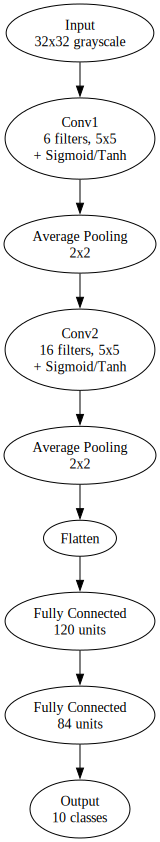

In [63]:
from graphviz import Digraph
from IPython.display import display

dot = Digraph(comment='LeNet Flow')

dot.node('A', 'Input\n32x32 grayscale')
dot.node('B', 'Conv1\n6 filters, 5x5\n+ Sigmoid/Tanh')
dot.node('C', 'Average Pooling\n2x2')
dot.node('D', 'Conv2\n16 filters, 5x5\n+ Sigmoid/Tanh')
dot.node('E', 'Average Pooling\n2x2')
dot.node('F', 'Flatten')
dot.node('G', 'Fully Connected\n120 units')
dot.node('H', 'Fully Connected\n84 units')
dot.node('I', 'Output\n10 classes')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI'])

display(dot)

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data (28x28 grayscale images)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data: normalize and reshape to (28,28,1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define LeNet model
model = models.Sequential([
    layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=2),
    layers.Conv2D(16, kernel_size=5, activation='tanh'),
    layers.AveragePooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8143 - loss: 0.6863 - val_accuracy: 0.9602 - val_loss: 0.1368
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9531 - loss: 0.1513 - val_accuracy: 0.9710 - val_loss: 0.0963
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9708 - loss: 0.0923 - val_accuracy: 0.9810 - val_loss: 0.0677
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9788 - loss: 0.0682 - val_accuracy: 0.9817 - val_loss: 0.0635
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9830 - loss: 0.0536 - val_accuracy: 0.9840 - val_loss: 0.0533
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9775 - loss: 0.0667
Test accuracy: 0.9813


---

### 2. **AlexNet (2012) 🚀**

- **Context:**  
  Huge ImageNet breakthrough; popularized deep CNNs.

- **Design:**  
  - Input: 224x224 RGB images  
  - Uses **ReLU** for fast training  
  - First to use **GPU acceleration** and **dropout**  
  - Overlapping max pooling and data augmentation

- **Impact:**  
  Sparked deep learning explosion in computer vision.

- **Flow:**  




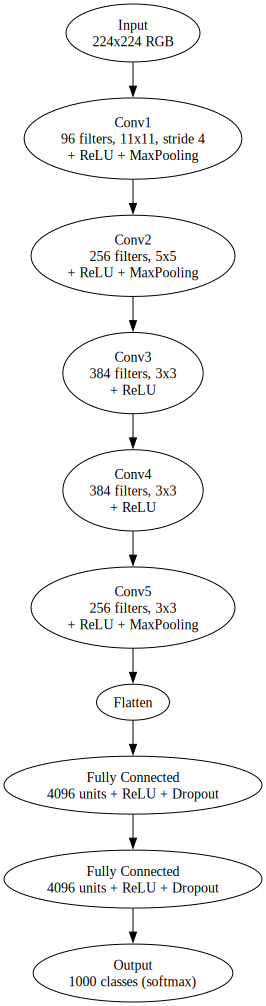

In [66]:
dot = Digraph(comment='AlexNet Flow')

dot.node('A', 'Input\n224x224 RGB')
dot.node('B', 'Conv1\n96 filters, 11x11, stride 4\n+ ReLU + MaxPooling')
dot.node('C', 'Conv2\n256 filters, 5x5\n+ ReLU + MaxPooling')
dot.node('D', 'Conv3\n384 filters, 3x3\n+ ReLU')
dot.node('E', 'Conv4\n384 filters, 3x3\n+ ReLU')
dot.node('F', 'Conv5\n256 filters, 3x3\n+ ReLU + MaxPooling')
dot.node('G', 'Flatten')
dot.node('H', 'Fully Connected\n4096 units + ReLU + Dropout')
dot.node('I', 'Fully Connected\n4096 units + ReLU + Dropout')
dot.node('J', 'Output\n1000 classes (softmax)')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ'])

display(dot)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define AlexNet-like model for CIFAR-10
model = models.Sequential([
    # 1st Conv Layer
    layers.Conv2D(96, (3,3), strides=1, padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # 2nd Conv Layer
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    # 3rd Conv Layer
    layers.Conv2D(384, (3,3), padding='same', activation='relu'),

    # 4th Conv Layer
    layers.Conv2D(384, (3,3), padding='same', activation='relu'),

    # 5th Conv Layer
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),

    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


/Users/danielaandaluz/miniforge3/envs/tf-macos/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-22 11:43:41.832400: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-22 11:43:41.832545: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-22 11:43:41.832554: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-05-22 11:43:41.832744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-22 11:43:41.832753: I tensorflow/core/common_runtime/pluggable_device/pluggab

Epoch 1/20


2025-05-22 11:43:44.141326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


352/352 ━━━━━━━━━━━━━━━━━━━━ 72s 189ms/step - accuracy: 0.1714 - loss: 58.5454 - val_accuracy: 0.1750 - val_loss: 186.7259
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 66s 186ms/step - accuracy: 0.2912 - loss: 65.2846 - val_accuracy: 0.3104 - val_loss: 102.9742
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 69s 197ms/step - accuracy: 0.3685 - loss: 103.4158 - val_accuracy: 0.3032 - val_loss: 214.4520
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.4328 - loss: 124.2556 - val_accuracy: 0.2382 - val_loss: 264.5020
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 233ms/step - accuracy: 0.4965 - loss: 129.5591 - val_accuracy: 0.5638 - val_loss: 136.0012
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 235ms/step - accuracy: 0.5497 - loss: 144.8802 - val_accuracy: 0.3828 - val_loss: 254.0670
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 230ms/step - accuracy: 0.5820 - loss: 150.3240 - val_accuracy: 0.5048 - val_loss: 187.6671
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 231ms/step - accuracy: 0

---

### 3. **VGG (2014) 🎯**

- **Context:**  
  Explored increasing depth using only small (3x3) filters.

- **Design:**  
  - Uniform blocks of 2-3 conv layers with 3x3 filters + max pooling  
  - Very deep: 16 or 19 layers  
  - Uses 1x1 conv for dimension adjustment

- **Insight:**  
  Small filters stacked deepen receptive field with fewer parameters.

- **Flow (VGG16):**  



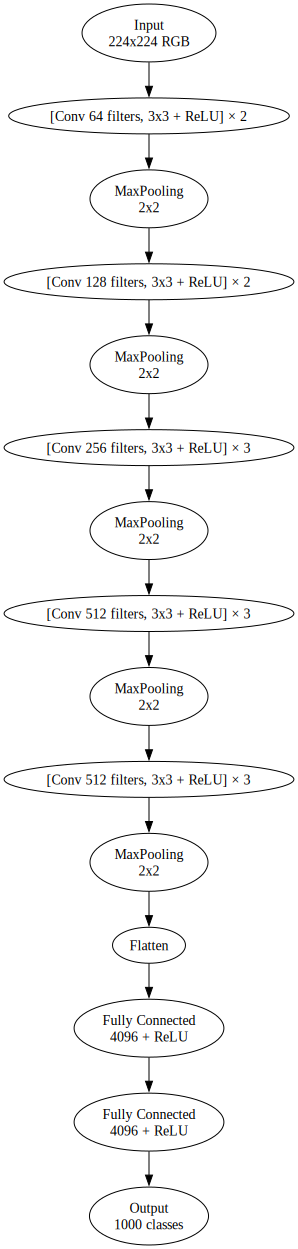

In [69]:

dot = Digraph(comment='VGG16 Flow')

dot.node('A', 'Input\n224x224 RGB')
dot.node('B', '[Conv 64 filters, 3x3 + ReLU] × 2')
dot.node('C', 'MaxPooling\n2x2')
dot.node('D', '[Conv 128 filters, 3x3 + ReLU] × 2')
dot.node('E', 'MaxPooling\n2x2')
dot.node('F', '[Conv 256 filters, 3x3 + ReLU] × 3')
dot.node('G', 'MaxPooling\n2x2')
dot.node('H', '[Conv 512 filters, 3x3 + ReLU] × 3')
dot.node('I', 'MaxPooling\n2x2')
dot.node('J', '[Conv 512 filters, 3x3 + ReLU] × 3')
dot.node('K', 'MaxPooling\n2x2')
dot.node('L', 'Flatten')
dot.node('M', 'Fully Connected\n4096 + ReLU')
dot.node('N', 'Fully Connected\n4096 + ReLU')
dot.node('O', 'Output\n1000 classes')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'JK', 'KL', 'LM', 'MN', 'NO'])

display(dot)


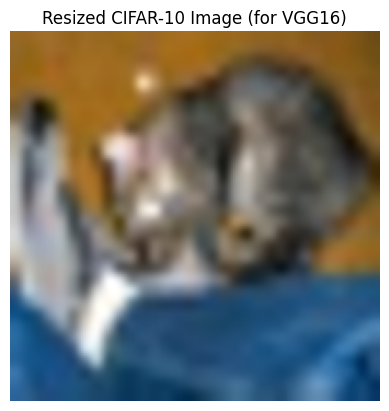

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Predicted: [('n03803284', 'muzzle', 0.7124752), ('n03840681', 'ocarina', 0.24617034), ('n03868863', 'oxygen_mask', 0.03527665)]


In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load pretrained VGG16 model
model = VGG16(weights='imagenet')

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Take the first image from test set
img = x_test[0]

# Resize image to 224x224 (VGG16 input size)
img_resized = array_to_img(img).resize((224, 224))

# Display the image
plt.imshow(img_resized)
plt.title("Resized CIFAR-10 Image (for VGG16)")
plt.axis('off')
plt.show()

# Convert image to array and preprocess
x = img_to_array(img_resized)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict
preds = model.predict(x)

# Decode predictions
print("Predicted:", decode_predictions(preds, top=3)[0])


---

### 4. **ResNet (2015) 🔄**

- **Context:**  
  Tackled degradation problem in very deep nets.

- **Design:**  
  - Introduced **residual (skip) connections**: output = input + F(input)  
  - Enables very deep networks (50, 101, 152 layers) without vanishing gradients  
  - Uses bottleneck blocks with 1x1 conv for efficiency

- **Impact:**  
  Allowed training of ultra-deep networks, setting new benchmarks.

- **Flow (ResNet-50 simplified):**  



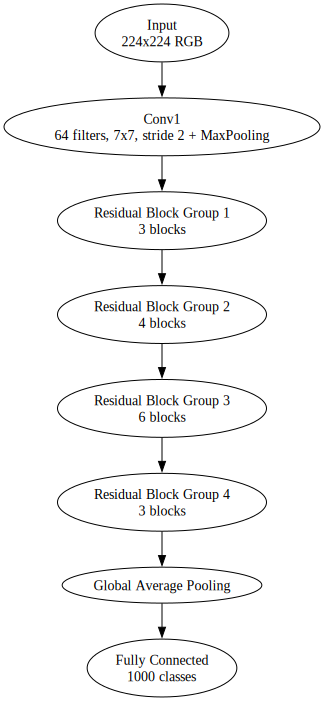

In [72]:
dot = Digraph(comment='ResNet-50 Flow')

dot.node('A', 'Input\n224x224 RGB')
dot.node('B', 'Conv1\n64 filters, 7x7, stride 2 + MaxPooling')
dot.node('C', 'Residual Block Group 1\n3 blocks')
dot.node('D', 'Residual Block Group 2\n4 blocks')
dot.node('E', 'Residual Block Group 3\n6 blocks')
dot.node('F', 'Residual Block Group 4\n3 blocks')
dot.node('G', 'Global Average Pooling')
dot.node('H', 'Fully Connected\n1000 classes')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH'])

display(dot)

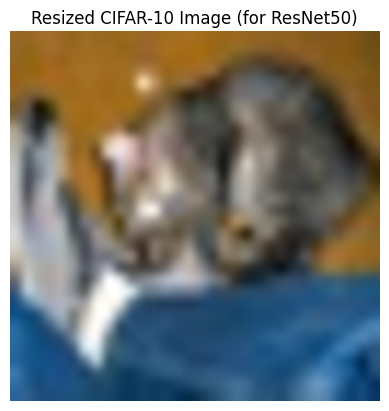

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: [('n02490219', 'marmoset', 0.22518098), ('n02100236', 'German_short-haired_pointer', 0.08708325), ('n02095889', 'Sealyham_terrier', 0.07449179)]
True label: cat


In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pretrained ResNet50 model
model = ResNet50(weights='imagenet')

# Load CIFAR-10 dataset
(_, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Select one image from CIFAR-10
img = x_test[0]
label_index = y_test[0][0]

# Resize image to 224x224 (ResNet50 expects this size)
img_resized = array_to_img(img).resize((224, 224))

# Show the image
plt.imshow(img_resized)
plt.title("Resized CIFAR-10 Image (for ResNet50)")
plt.axis('off')
plt.show()

# Preprocess image
x = img_to_array(img_resized)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict with ResNet50
preds = model.predict(x)

# Decode top-3 predictions
print("Predicted:", decode_predictions(preds, top=3)[0])
from tensorflow.keras.datasets import cifar10


# Get label of the first test image


# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print actual label
print("True label:", class_names[label_index])



---

### 5. **Inception (2014) 🌐**

- **Context:**  
  Efficient multi-scale feature extraction.

- **Design:**  
  - Inception modules with parallel filters: 1x1, 3x3, 5x5, and pooling branches  
  - 1x1 convolutions reduce dimensionality before expensive filters  
  - Stacks inception modules to build the network

- **Impact:**  
  Combines multi-scale info, computationally efficient.

- **Flow (Inception v1 simplified):**  


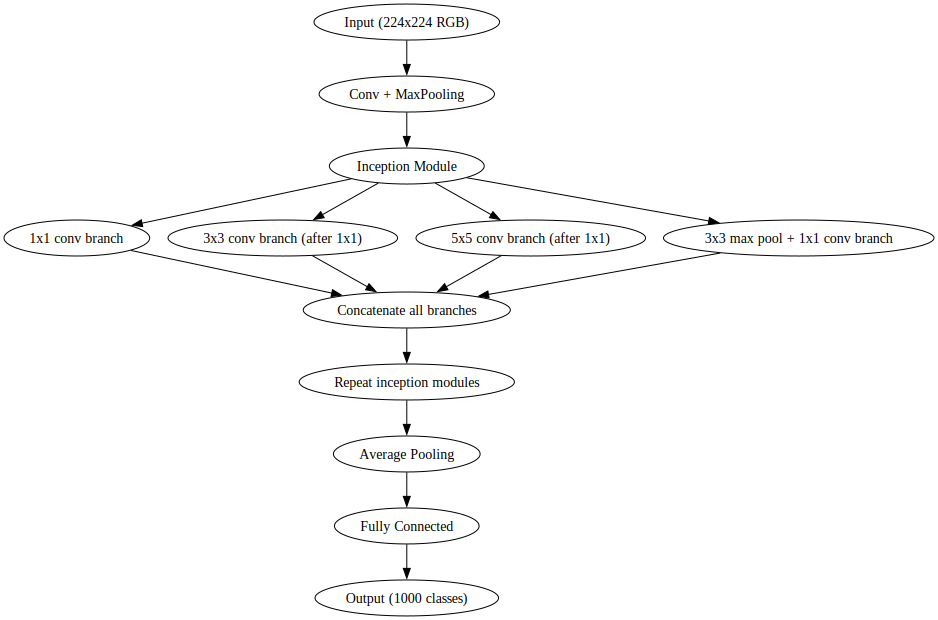

In [61]:


dot = Digraph(comment='Inception v1 Flow')

dot.node('A', 'Input (224x224 RGB)')
dot.node('B', 'Conv + MaxPooling')
dot.node('C', 'Inception Module')
dot.node('D1', '1x1 conv branch')
dot.node('D2', '3x3 conv branch (after 1x1)')
dot.node('D3', '5x5 conv branch (after 1x1)')
dot.node('D4', '3x3 max pool + 1x1 conv branch')
dot.node('E', 'Concatenate all branches')
dot.node('F', 'Repeat inception modules')
dot.node('G', 'Average Pooling')
dot.node('H', 'Fully Connected')
dot.node('I', 'Output (1000 classes)')

dot.edges(['AB', 'BC'])
dot.edge('C', 'D1')
dot.edge('C', 'D2')
dot.edge('C', 'D3')
dot.edge('C', 'D4')
dot.edge('D1', 'E')
dot.edge('D2', 'E')
dot.edge('D3', 'E')
dot.edge('D4', 'E')
dot.edges(['EF', 'FG', 'GH', 'HI'])

# Display inline in the notebook
display(dot)


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


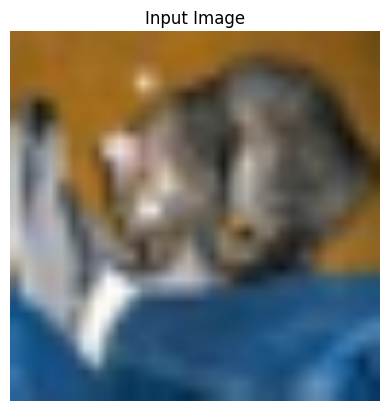

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: [('n02951585', 'can_opener', 0.12052079), ('n02100236', 'German_short-haired_pointer', 0.08219008), ('n03803284', 'muzzle', 0.07024588)]


In [16]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load model
model = InceptionV3(weights='imagenet')

# Load CIFAR-10 and pick one image
(_, _), (x_test, _) = cifar10.load_data()
img = x_test[0]

# Resize image to 299x299
img_resized = tf.image.resize(img, (299, 299))

# Display image
plt.imshow(array_to_img(img_resized))
plt.axis('off')
plt.title("Input Image")
plt.show()

# Prepare input
x = np.expand_dims(img_resized.numpy(), axis=0)
x = preprocess_input(x)

# Predict
preds = model.predict(x)
print("Predicted:", decode_predictions(preds, top=3)[0])



---

### Summary of Key Innovations 🚩

| Model      | Innovation                                   | Why It Matters                                                                                     |
|------------|---------------------------------------------|--------------------------------------------------------------------------------------------------|
| **LeNet**  | Weight sharing & local receptive fields 🧠   | Introduced the core CNN concept, enabling efficient feature learning and fewer parameters. A foundational breakthrough in neural networks. |
| **AlexNet**| ReLU activations, dropout, GPU acceleration 🚀 | Made training deep CNNs feasible and practical at scale, dramatically improving image recognition accuracy. Sparked the deep learning revolution. |
| **VGG**    | Very deep networks with uniform small (3x3) convolutions 🎯 | Demonstrated that stacking simple, small filters deeply improves performance, simplifying architecture design without complex modules. |
| **ResNet** | Residual (skip) connections 🔄                 | Solved the vanishing gradient problem, enabling ultra-deep networks (50+ layers) to be trained effectively, pushing state-of-the-art performance. |
| **Inception** | Parallel multi-scale filters and dimensionality reduction 🌐 | Efficiently extracts features at multiple scales simultaneously, optimizing computation and improving accuracy without drastically increasing model size. |

---




# 🔁 Transfer Learning

**Definition:**  
Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second, related task.

---

## Why it matters

- Training deep models from scratch requires large amounts of data and computational power.
- Many real-world problems have limited labeled data available.
- Transfer learning leverages knowledge from a pretrained model trained on a large dataset to improve learning on a smaller or related task.

---

## How it works

You start with a pretrained model already trained on a source domain and task, then repurpose it for a target domain and task by leveraging learned feature representations (weights).

Formally:

- Source domain: $D_S = \{X_S, P(X_S)\}$
- Source task: $T_S = \{Y_S, f_S(X_S)\}$
- Target domain: $D_T = \{X_T, P(X_T)\}$
- Target task: $T_T = \{Y_T, f_T(X_T)\}$

The goal of transfer learning is to improve $f_T(\cdot)$ in $T_T$ using knowledge from $D_S$ and $T_S$.

---



In [83]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

# Load Cats vs Dogs dataset with TensorFlow Datasets
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Preprocessing function to resize images and normalize pixel values
IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # normalize to [0,1]
    return image, label

ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Load pretrained MobileNetV2 without top layer
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# Add classification head
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification

model = models.Model(inputs, outputs)

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model (only classification head trains)
model.fit(ds_train, validation_data=ds_val, epochs=3)


Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 83s 137ms/step - accuracy: 0.9493 - loss: 0.1350 - val_accuracy: 0.9822 - val_loss: 0.0447
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - accuracy: 0.9840 - loss: 0.0448 - val_accuracy: 0.9843 - val_loss: 0.0420
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 78s 134ms/step - accuracy: 0.9861 - loss: 0.0392 - val_accuracy: 0.9852 - val_loss: 0.0420


# ⚙️ Fine-Tuning

**Definition:**  
Fine-tuning is the process of continuing the training of a pretrained model on a new task, typically with a smaller learning rate.

---

## How it works

1. Load a pretrained model with parameters $\theta$ trained on $D_S$.
2. Replace the task-specific output layer to fit the new target task $T_T$.
3. Optionally freeze early layers that capture general features.
4. Continue training on the target dataset with a smaller learning rate $\eta$ using backpropagation:

$$
\theta' = \theta - \eta \cdot \nabla_\theta L_T(f_\theta(X_T), Y_T)
$$

where $L_T$ is the loss function on the target task.

---



In [85]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True

# Let's fine-tune from this layer onwards
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # smaller LR
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Continue training (fine-tuning)
model.fit(ds_train, validation_data=ds_val, epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 180s 292ms/step - accuracy: 0.9234 - loss: 0.1923 - val_accuracy: 0.9796 - val_loss: 0.0703
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 195s 334ms/step - accuracy: 0.9767 - loss: 0.0594 - val_accuracy: 0.9830 - val_loss: 0.0533
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 184s 315ms/step - accuracy: 0.9857 - loss: 0.0408 - val_accuracy: 0.9815 - val_loss: 0.0482
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 673s 1s/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9830 - val_loss: 0.0484
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 190s 326ms/step - accuracy: 0.9934 - loss: 0.0234 - val_accuracy: 0.9830 - val_loss: 0.0479


## When to use

| Scenario                 | Recommended Approach                      |
|--------------------------|------------------------------------------|
| Very little target data   | Transfer learning with frozen layers     |
| Moderate target data      | Fine-tuning with partial or full unfreezing |
| Large target dataset      | Training from scratch or extensive fine-tuning |

---

# 🔍 Summary

| Concept          | Transfer Learning                     | Fine-Tuning                                 |
|------------------|-------------------------------------|---------------------------------------------|
| What it is       | Using a pretrained model on a new task | Adjusting a pretrained model by continuing training |
| Requires large data? | No                                  | No, but more data helps                      |
| Modifies weights? | Not necessarily                     | Yes, for some or all layers                  |
| Typical use case | Small dataset, related new task     | Moderate dataset, task-specific adaptation  |
| Intuitive view   | "Borrowing general knowledge"       | "Adapting to a specific use-case"           |
| Technical view   | Reusing pretrained weights          | Continuing training with smaller learning rate and optionally freezing layers |
| Benefits         | Faster convergence, better generalization | Leverages pretrained features, reduces overfitting |

